In [1]:
#%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
from pandas import DataFrame
import copy
import random

In [2]:
vaso_maxchange = pd.read_csv(r"data_noshuffle\vaso_maxchange.csv")

In [5]:
vaso_maxchange.loc[vaso_maxchange.abchange_vaso_aimax>=1.05,["hosp_id","vaso_changemmax","abchange_vaso_aimax"]]

,hosp_id,vaso_changemmax,abchange_vaso_aimax
4,+3K5K0y5Z9gODdZOueKj23lkwH4NFo6EPqBKwpMmM7w=,0.000,1.05
66,+iAqTpDH851g+3XaCvrZAo+9LNUGkEZt5J7kqqjZvDI=,0.140,1.05
116,/GGnvMTLD3UdAy2cgy43W0e7r7qbnqMO2fcDtYxPsLo=,0.400,1.05
118,/JN3HleHSxCxqJtlakVuXgdTMD3XD1mKtFpPjvyVdmU=,0.195,1.05
134,/UymyI3+1Xzp+cfFiJ9kidxVhWtzBz2vgml2auGrUbo=,0.080,1.05
...,...,...,...
6141,z1RhyErEXD8w6lQe61rKfCLHZ00TI+4VG18w9n57S4c=,1.050,1.05
6167,zJhCrM7ju15kgDbcKWn9DighLECnL2IDN5EsY93vw1s=,0.300,1.05
6169,zKUZdl2QYOT/lHMD/3HY18U36V4xyTaRvBb/ZwVYu/A=,1.000,1.05
6179,zU9CrdRKQPbBCv3EsF0IYqMY9zZASuvq41hiAGwHgLg=,0.300,1.05


In [48]:
ai_p = pd.read_csv(r"data_noshuffle\ai_opt.csv")
clin_p = pd.read_csv(r"data\clin_p_old.csv")
intm1_p = pd.read_csv(r"data_noshuffle\intm1_opt.csv")
intm2_p = pd.read_csv(r"data_noshuffle\intm2_opt.csv")
vaso1_p = pd.read_csv(r"data_noshuffle\vaso1_opt.csv")
vaso2_p = pd.read_csv(r"data_noshuffle\vaso2_opt.csv")
vaso3_p = pd.read_csv(r"data_noshuffle\vaso3_opt.csv")

intm3_p = pd.read_csv(r"data_noshuffle\intm3_opt.csv")
intm3_p.columns = ['state',1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,"ai_action"]
ai_p.columns = ['state',1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,"ai_action"]
intm1_p.columns = ['state',1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,"ai_action"]
intm2_p.columns = ['state',1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,"ai_action"]
vaso1_p.columns = ['state',1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,"ai_action"]
vaso2_p.columns = ['state',1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,"ai_action"]
vaso3_p.columns = ['state',1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,"ai_action"]


#ai_p.state= ai_p.state+1
#intm1_p.state= intm1_p.state+1
#intm2_p.state= intm2_p.state+1
#vaso5_p.state= vaso5_p.state+1
#vaso10_p.state= vaso10_p.state+1
#vaso15_p.state= vaso15_p.state+1

random.seed(42)
test_ids = pd.read_csv(r"D:\Liling\OneDrive - University of Pittsburgh\master_thesis\q_learning_discrete_state\data\test_id.csv")
data_all = pd.read_csv(r"data\data_cont_vaso_reward.csv")
data_change_noscale = pd.read_csv(r"D:\Liling\OneDrive - University of Pittsburgh\master_thesis\rl_v1\data\data_all.csv")

#data = data_all[data_all.last_record == 0]
data_all['fluid'] = data_change_noscale.fluid.tolist()
data = copy.deepcopy(data_all)
test_df = data[data.hosp_id.isin (test_ids['hosp_id'].tolist())]

test_data = test_df[['hosp_id','interval','fluid', 'norepi_equiv', 'action', 'dead_90',\
                     'reward_orig','reward_intm1','reward_intm2','state',\
                    'reward_vaso','last_record']]

intm3_p_test = copy.deepcopy(test_data)

intm3_p_test = intm3_p_test.merge(intm3_p,how='left',on='state')
intm3_p_test = intm3_p_test.drop(columns=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25])

ai_p_test = copy.deepcopy(test_data)

ai_p_test = ai_p_test.merge(ai_p,how='left',on='state')
ai_p_test = ai_p_test.drop(columns=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25])
#
#for i in ai_p_test.index:
#  rand = np.random.uniform(0,1)
#  if rand <0.1:
#    ai_p_test.loc[i,"ai_action"] = random.randint(1,25)
  
intm1_p_test = copy.deepcopy(test_data)

intm1_p_test = intm1_p_test.merge(intm1_p,how='left',on='state')
intm1_p_test = intm1_p_test.drop(columns=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25])
#for i in intm1_p_test.index:
#  rand = np.random.uniform(0,1)
#  if rand <0.1:
#    intm1_p_test.loc[i,"ai_action"] = random.randint(1,25)
  

intm2_p_test = copy.deepcopy(test_data)

intm2_p_test = intm2_p_test.merge(intm2_p,how='left',on='state')
intm2_p_test = intm2_p_test.drop(columns=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25])
#for i in intm2_p_test.index:
#  rand = np.random.uniform(0,1)
#  if rand <0.1:
#    intm2_p_test.loc[i,"ai_action"] = random.randint(1,25)
  

vaso1_p_test = copy.deepcopy(test_data)

vaso1_p_test = vaso1_p_test.merge(vaso1_p,how='left',on='state')
vaso1_p_test = vaso1_p_test.drop(columns=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25])
#for i in vaso5_p_test.index:
#  rand = np.random.uniform(0,1)
#  if rand <0.1:
#    vaso5_p_test.loc[i,"ai_action"] = random.randint(1,25)
vaso2_p_test = copy.deepcopy(test_data)

vaso2_p_test = vaso2_p_test.merge(vaso2_p,how='left',on='state')
vaso2_p_test = vaso2_p_test.drop(columns=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25])  

vaso3_p_test = copy.deepcopy(test_data)

vaso3_p_test = vaso3_p_test.merge(vaso3_p,how='left',on='state')
vaso3_p_test = vaso3_p_test.drop(columns=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25])  
df_action = ai_p_test[['hosp_id','action','ai_action','norepi_equiv','fluid']]

df_action['intm1_action'] = intm1_p_test.ai_action
df_action['intm2_action'] = intm2_p_test.ai_action
df_action['intm3_action'] = intm3_p_test.ai_action
df_action['vaso1_action'] = vaso1_p_test.ai_action
df_action['vaso2_action'] = vaso2_p_test.ai_action
df_action['vaso3_action'] = vaso3_p_test.ai_action
action_map = {}
count = 0
for iv in range(5):
    for vaso in range(5):
        action_map[(iv,vaso)] = count
        count += 1

#vaso_df['vaso_input'] = discretised_int['max_dose_vaso']
df_action['vaso']=0
df_action['vaso'][(df_action['norepi_equiv'] > 0.5)] = 4
df_action['vaso'][(df_action['norepi_equiv'] > 0.2) & (df_action['norepi_equiv'] <= 0.5)] = 3
df_action['vaso'][(df_action['norepi_equiv'] > 0.09) & (df_action['norepi_equiv'] <= 0.2)] = 2
df_action['vaso'][(df_action['norepi_equiv'] > 0.0) & (df_action['norepi_equiv'] <= 0.09)] = 1
df_action['vaso'][df_action['norepi_equiv'] == 0.0] = 0



#vaso_df['vaso_input'] = discretised_int['max_dose_vaso']
df_action['iv']=0
df_action['iv'][df_action['fluid'] == 0.0] = 0
df_action['iv'][(df_action['fluid'] > 0.0) & (df_action['fluid'] <= 250)] = 1
df_action['iv'][(df_action['fluid'] > 250) & (df_action['fluid'] <= 400)] = 2
df_action['iv'][(df_action['fluid'] > 400) & (df_action['fluid'] <= 700)] = 3
df_action['iv'][(df_action['fluid'] > 700)] = 4

C:\Users\lulil\Desktop\fastbook\myenv\lib\site-packages\ipykernel_launcher.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\lulil\Desktop\fastbook\myenv\lib\site-packages\ipykernel_launcher.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\lulil\Desktop\fastbook\myenv\lib\site-packages\ipykernel_launcher.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [63]:
data_all.head(20)

,hosp_id,interval,sofa_total,norepi_equiv,lactate,action,dead_90,reward_orig,state,next_state,...,vaso_change,reward_intm1,reward_intm2,reward_vaso5,reward_vaso10,reward_vaso15,reward_vaso,reward_vaso1,reward_vaso2,fluid
0,++Q7obcTFvuaocJ2OPM9rrp0O22cEI0Pes4pfPeZu74=,6.0,5.0,0.0,1.7,1.0,0.0,0,669,669,...,0.0,-0.074336,0.050664,0,0,0,0.5,0.5,0.5,0.000000
1,++Q7obcTFvuaocJ2OPM9rrp0O22cEI0Pes4pfPeZu74=,7.0,4.0,0.0,1.8,1.0,0.0,0,669,669,...,0.0,1.199099,1.324099,0,0,0,0.5,0.5,0.5,0.000000
2,++Q7obcTFvuaocJ2OPM9rrp0O22cEI0Pes4pfPeZu74=,8.0,3.0,0.0,1.2,1.0,0.0,0,669,669,...,0.0,-1.457596,-1.482596,0,0,0,0.5,0.5,0.5,0.000000
3,++Q7obcTFvuaocJ2OPM9rrp0O22cEI0Pes4pfPeZu74=,9.0,3.0,0.0,2.1,1.0,0.0,0,669,669,...,0.0,-0.025000,-0.050000,0,0,0,0.5,0.5,0.5,0.000000
4,++Q7obcTFvuaocJ2OPM9rrp0O22cEI0Pes4pfPeZu74=,10.0,3.0,0.0,2.1,1.0,0.0,0,669,669,...,0.0,-0.025000,-0.050000,0,0,0,0.5,0.5,0.5,0.000000
5,++Q7obcTFvuaocJ2OPM9rrp0O22cEI0Pes4pfPeZu74=,11.0,3.0,0.0,2.1,1.0,0.0,0,669,669,...,0.0,-0.025000,-0.050000,0,0,0,0.5,0.5,0.5,0.000000
6,++Q7obcTFvuaocJ2OPM9rrp0O22cEI0Pes4pfPeZu74=,12.0,3.0,0.0,2.1,1.0,0.0,0,669,669,...,0.0,0.125000,0.250000,0,0,0,0.5,0.5,0.5,0.000000
7,++Q7obcTFvuaocJ2OPM9rrp0O22cEI0Pes4pfPeZu74=,13.0,2.0,0.0,2.1,1.0,0.0,0,669,669,...,0.0,-0.025000,-0.050000,0,0,0,0.5,0.5,0.5,0.000000
8,++Q7obcTFvuaocJ2OPM9rrp0O22cEI0Pes4pfPeZu74=,14.0,2.0,0.0,2.1,1.0,0.0,0,669,210,...,0.0,-0.419751,-0.444751,0,0,0,0.5,0.5,0.5,0.000000
9,++Q7obcTFvuaocJ2OPM9rrp0O22cEI0Pes4pfPeZu74=,15.0,2.0,0.0,2.3,1.0,0.0,0,210,210,...,0.0,-0.025000,-0.050000,0,0,0,0.5,0.5,0.5,0.000000


In [49]:
a = df_action['norepi_equiv'][df_action['vaso'] == 1]
action1=[round(a.min(),4),round(a.max(),4),round(a.median(),4)]
b = df_action['norepi_equiv'][df_action['vaso'] == 2]
action2=[round(b.min(),4),round(b.max(),4),round(b.median(),4)]
c = df_action['norepi_equiv'][df_action['vaso'] == 3]
action3=[round(c.min(),4),round(c.max(),4),round(c.median(),4)]
d = df_action['norepi_equiv'][df_action['vaso'] == 4]
action4=[round(d.min(),4),round(d.max(),4),round(d.median(),4)]
print(action1, action2,action3, action4)

[0.0045, 0.09, 0.04] [0.09, 0.2, 0.15] [0.2, 0.5, 0.31] [0.51, 8.5, 1.05]


In [50]:
inv_action_map = {}
count = 1
for i in range(5):
    for j in range(5):
        inv_action_map[count] = [i,j]
        count += 1


df_action["ai_action"] = df_action['ai_action'].astype(int)

ai_test_actions = np.array([inv_action_map[i] for i in df_action.ai_action.tolist()])
intm1_test_actions = np.array([inv_action_map[i] for i in df_action.intm1_action.tolist()])
intm2_test_actions = np.array([inv_action_map[i] for i in df_action.intm2_action.tolist()])
intm3_test_actions = np.array([inv_action_map[i] for i in df_action.intm3_action.tolist()])
vaso1_test_actions = np.array([inv_action_map[i] for i in df_action.vaso1_action.tolist()])
vaso2_test_actions = np.array([inv_action_map[i] for i in df_action.vaso2_action.tolist()])
vaso3_test_actions = np.array([inv_action_map[i] for i in df_action.vaso3_action.tolist()])
clin_test_actions = np.array([inv_action_map[i] for i in df_action.action.tolist()])

df_action['vaso_ai']=ai_test_actions[:,1]
#df_action['vaso_p15']=test_actions_p15[:,1]
df_action['vaso_intm1']=intm1_test_actions[:,1]

df_action['vaso_intm2']=intm2_test_actions[:,1]
df_action['vaso_intm3']=intm3_test_actions[:,1]

df_action['vaso_vaso1']=vaso1_test_actions[:,1]
df_action['vaso_vaso2']=vaso2_test_actions[:,1]
df_action['vaso_vaso3']=vaso3_test_actions[:,1]
df_action['vaso']=clin_test_actions[:,1]

df_action['iv_ai']=ai_test_actions[:,0]
#df_action['iv_p15']=test_actions_p15[:,0]
df_action['iv_intm1']=intm1_test_actions[:,0]

df_action['iv_intm2']=intm2_test_actions[:,0]
df_action['iv_intm3']=intm3_test_actions[:,0]

df_action['iv_vaso1']=vaso1_test_actions[:,0]
df_action['iv_vaso2']=vaso2_test_actions[:,0]
df_action['iv_vaso3']=vaso3_test_actions[:,0]


df_action['iv']=clin_test_actions[:,0]

In [86]:
(df_action.action == df_action.ai_action).value_counts()

False    44036
True     18175
dtype: int64

In [87]:
(df_action.action == df_action.intm1_action).value_counts()

False    44118
True     18093
dtype: int64

In [88]:
(df_action.vaso == df_action.vaso_ai).value_counts()

True     52581
False     9630
dtype: int64

In [89]:
(df_action.iv == df_action.iv_ai).value_counts()

False    41351
True     20860
dtype: int64

In [90]:
(df_action.action == df_action.intm2_action).value_counts()

False    44349
True     17862
dtype: int64

In [91]:
(df_action.action == df_action.vaso1_action).value_counts()

False    42983
True     19228
dtype: int64

In [92]:
(df_action.action == df_action.vaso2_action).value_counts()

False    43232
True     18979
dtype: int64

In [51]:
df_action.to_csv("data_noshuffle/vaso_change_test_action_iv_vaso_old.csv")

In [94]:
df_action.vaso.value_counts()/df_action.shape[0]

0    0.854849
3    0.043143
1    0.038385
4    0.034351
2    0.029271
Name: vaso, dtype: float64

In [95]:
df_action.iv.value_counts()/df_action.shape[0]

0    0.468486
4    0.165019
2    0.157689
1    0.107393
3    0.101413
Name: iv, dtype: float64

In [16]:
df_action.iv_ai.value_counts()/df_action.shape[0]

0    0.497388
2    0.197698
4    0.148527
3    0.087589
1    0.068798
Name: iv_ai, dtype: float64

In [17]:
df_action.vaso_ai.value_counts()/df_action.shape[0]

0    0.968157
4    0.015383
3    0.009291
1    0.003890
2    0.003279
Name: vaso_ai, dtype: float64

In [18]:
df_action.iv_intm1.value_counts()/df_action.shape[0]

0    0.485316
2    0.205157
4    0.153654
3    0.088505
1    0.067368
Name: iv_intm1, dtype: float64

In [19]:
df_action.vaso_intm1.value_counts()/df_action.shape[0]

0    0.969668
4    0.011043
3    0.008632
2    0.006478
1    0.004179
Name: vaso_intm1, dtype: float64

In [20]:
df_action.iv_intm2.value_counts()/df_action.shape[0]

0    0.472794
2    0.210542
4    0.152352
3    0.096784
1    0.067528
Name: iv_intm2, dtype: float64

In [21]:
df_action.iv_vaso1.value_counts()/df_action.shape[0]

0    0.497388
2    0.197698
4    0.148527
3    0.087589
1    0.068798
Name: iv_vaso1, dtype: float64

In [22]:
df_action.vaso_vaso1.value_counts()/df_action.shape[0]

0    0.968157
4    0.015383
3    0.009291
1    0.003890
2    0.003279
Name: vaso_vaso1, dtype: float64

In [35]:
action_dose_map = {0: 0, 1: action1[2], 2: action2[2], 3: action3[2], 4:action4[2]}

In [112]:
print(action_dose_map)

{0: 0, 1: 0.04, 2: 0.15, 3: 0.31, 4: 1.05}


In [68]:
max( df_action['vaso_ai'])

4

In [52]:
df_action['dose_vaso_ai'] = df_action['vaso_ai'].apply(lambda x:action_dose_map[x])
#df_action['dose_vaso_p15'] = df_action['vaso_p15'].apply(lambda x:action_dose_map[x])
df_action['dose_vaso_intm1'] = df_action['vaso_intm1'].apply(lambda x:action_dose_map[x])

df_action['dose_vaso_intm2'] = df_action['vaso_intm2'].apply(lambda x:action_dose_map[x])
df_action['dose_vaso_intm3'] = df_action['vaso_intm3'].apply(lambda x:action_dose_map[x])

df_action['dose_vaso_vaso1'] = df_action['vaso_vaso1'].apply(lambda x:action_dose_map[x])
df_action['dose_vaso_vaso2'] = df_action['vaso_vaso2'].apply(lambda x:action_dose_map[x])
df_action['dose_vaso_vaso3'] = df_action['vaso_vaso3'].apply(lambda x:action_dose_map[x])
df_action['dose_vaso_clin'] = df_action['vaso'].apply(lambda x:action_dose_map[x])




In [53]:
df_action['abchange_vaso'] = 0 
for i in df_action.index:
        if i == 0:
            continue
        if df_action.loc[i, 'hosp_id'] == df_action.loc[i-1, 'hosp_id']:
            vaso_cur = df_action.loc[i, 'norepi_equiv']
            vaso_prev = df_action.loc[i-1, 'norepi_equiv']
            increase_rate = vaso_cur - vaso_prev
            df_action.loc[i, 'abchange_vaso'] = abs(increase_rate)


df_action['abchange_vaso_ai'] = 0 
for i in df_action.index:
        if i == 0:
            continue
        if df_action.loc[i, 'hosp_id'] == df_action.loc[i-1, 'hosp_id']:
            vaso_cur = df_action.loc[i, 'dose_vaso_ai']
            vaso_prev = df_action.loc[i-1, 'dose_vaso_ai']
            increase_rate = vaso_cur - vaso_prev
            df_action.loc[i, 'abchange_vaso_ai'] = abs(increase_rate)


df_action['abchange_vaso_intm1'] = 0 
for i in df_action.index:
        if i == 0:
            continue
        if df_action.loc[i, 'hosp_id'] == df_action.loc[i-1, 'hosp_id']:
            vaso_cur = df_action.loc[i, 'dose_vaso_intm1']
            vaso_prev = df_action.loc[i-1, 'dose_vaso_intm1']
            increase_rate = vaso_cur - vaso_prev
            df_action.loc[i, 'abchange_vaso_intm1'] = abs(increase_rate)


df_action['abchange_vaso_intm2'] = 0 
for i in df_action.index:
        if i == 0:
            continue
        if df_action.loc[i, 'hosp_id'] == df_action.loc[i-1, 'hosp_id']:
            vaso_cur = df_action.loc[i, 'dose_vaso_intm2']
            vaso_prev = df_action.loc[i-1, 'dose_vaso_intm2']
            increase_rate = vaso_cur - vaso_prev
            df_action.loc[i, 'abchange_vaso_intm2'] = abs(increase_rate)
df_action['abchange_vaso_intm3'] = 0 
for i in df_action.index:
        if i == 0:
            continue
        if df_action.loc[i, 'hosp_id'] == df_action.loc[i-1, 'hosp_id']:
            vaso_cur = df_action.loc[i, 'dose_vaso_intm3']
            vaso_prev = df_action.loc[i-1, 'dose_vaso_intm3']
            increase_rate = vaso_cur - vaso_prev
            df_action.loc[i, 'abchange_vaso_intm3'] = abs(increase_rate)

df_action['abchange_vaso_vaso1'] = 0 
for i in df_action.index:
        if i == 0:
            continue
        if df_action.loc[i, 'hosp_id'] == df_action.loc[i-1, 'hosp_id']:
            vaso_cur = df_action.loc[i, 'dose_vaso_vaso1']
            vaso_prev = df_action.loc[i-1, 'dose_vaso_vaso1']
            increase_rate = vaso_cur - vaso_prev
            df_action.loc[i, 'abchange_vaso_vaso1'] = abs(increase_rate)


df_action['abchange_vaso_vaso2'] = 0 
for i in df_action.index:
        if i == 0:
            continue
        if df_action.loc[i, 'hosp_id'] == df_action.loc[i-1, 'hosp_id']:
            vaso_cur = df_action.loc[i, 'dose_vaso_vaso2']
            vaso_prev = df_action.loc[i-1, 'dose_vaso_vaso2']
            increase_rate = vaso_cur - vaso_prev
            df_action.loc[i, 'abchange_vaso_vaso2'] = abs(increase_rate)
df_action['abchange_vaso_vaso3'] = 0 
for i in df_action.index:
        if i == 0:
            continue
        if df_action.loc[i, 'hosp_id'] == df_action.loc[i-1, 'hosp_id']:
            vaso_cur = df_action.loc[i, 'dose_vaso_vaso3']
            vaso_prev = df_action.loc[i-1, 'dose_vaso_vaso3']
            increase_rate = vaso_cur - vaso_prev
            df_action.loc[i, 'abchange_vaso_vaso3'] = abs(increase_rate)

In [38]:
df_action.shape

(62211, 43)

In [73]:
df_action.head()

,hosp_id,action,ai_action,norepi_equiv,fluid,intm1_action,intm2_action,vaso1_action,vaso2_action,vaso,...,dose_vaso_intm2,dose_vaso_vaso1,dose_vaso_vaso2,dose_vaso_clin,abchange_vaso,abchange_vaso_ai,abchange_vaso_intm1,abchange_vaso_intm2,abchange_vaso_vaso1,abchange_vaso_vaso2
0,++YlcVyz3GZYQgn+SUnjns/SY5oyL+tJ884LHa6xk/c=,6.0,21,0.00,200.0,21,21,21,1,0,...,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
1,++YlcVyz3GZYQgn+SUnjns/SY5oyL+tJ884LHa6xk/c=,6.0,21,0.00,250.0,21,21,21,1,0,...,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
2,++YlcVyz3GZYQgn+SUnjns/SY5oyL+tJ884LHa6xk/c=,11.0,21,0.00,375.0,21,21,21,1,0,...,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
3,++sVZMdnPthQ8j9GDO2lzn9JsycyZ/tmjpMgqg9zFVM=,22.0,21,0.04,2400.0,21,21,21,1,1,...,0.0,0.0,0.0,0.04,0.00,0.0,0.0,0.0,0.0,0.0
4,++sVZMdnPthQ8j9GDO2lzn9JsycyZ/tmjpMgqg9zFVM=,23.0,1,0.16,2300.0,1,1,1,1,2,...,0.0,0.0,0.0,0.15,0.12,0.0,0.0,0.0,0.0,0.0


In [54]:
comparision_test = df_action[['hosp_id', 'abchange_vaso_ai', 'abchange_vaso_intm1',\
                              'abchange_vaso','abchange_vaso_intm2','abchange_vaso_intm3','abchange_vaso_vaso1','abchange_vaso_vaso2','abchange_vaso_vaso3']]

In [55]:
############# get max vaso change by p5 action for each patient #################
df_grouped_intm1 = comparision_test.groupby('hosp_id').agg({'abchange_vaso_intm1':'max'})
df_grouped_intm1 = df_grouped_intm1.reset_index()
df_grouped_intm1 = df_grouped_intm1.rename(columns={'abchange_vaso_intm1':'abchange_vaso_intm1max'})

############# get max vaso change by p5 action for each patient #################
df_grouped_intm2 = comparision_test.groupby('hosp_id').agg({'abchange_vaso_intm2':'max'})
df_grouped_intm2 = df_grouped_intm2.reset_index()
df_grouped_intm2 = df_grouped_intm2.rename(columns={'abchange_vaso_intm2':'abchange_vaso_intm2max'})

############# get max vaso change by p5 action for each patient #################
df_grouped_intm3 = comparision_test.groupby('hosp_id').agg({'abchange_vaso_intm3':'max'})
df_grouped_intm3 = df_grouped_intm3.reset_index()
df_grouped_intm3 = df_grouped_intm3.rename(columns={'abchange_vaso_intm3':'abchange_vaso_intm3max'})

############# get max vaso change by p5 action for each patient #################
df_grouped_vaso1 = comparision_test.groupby('hosp_id').agg({'abchange_vaso_vaso1':'max'})
df_grouped_vaso1 = df_grouped_vaso1.reset_index()
df_grouped_vaso1 = df_grouped_vaso1.rename(columns={'abchange_vaso_vaso1':'abchange_vaso_vaso1max'})

############# get max vaso change by p5 action for each patient #################
df_grouped_vaso2 = comparision_test.groupby('hosp_id').agg({'abchange_vaso_vaso2':'max'})
df_grouped_vaso2 = df_grouped_vaso2.reset_index()
df_grouped_vaso2 = df_grouped_vaso2.rename(columns={'abchange_vaso_vaso2':'abchange_vaso_vaso2max'})

############# get max vaso change by p5 action for each patient #################
df_grouped_vaso3 = comparision_test.groupby('hosp_id').agg({'abchange_vaso_vaso3':'max'})
df_grouped_vaso3 = df_grouped_vaso3.reset_index()
df_grouped_vaso3 = df_grouped_vaso3.rename(columns={'abchange_vaso_vaso3':'abchange_vaso_vaso3max'})

############# get max vaso change by p15 action for each patient #################
df_grouped_clin = comparision_test.groupby('hosp_id').agg({'abchange_vaso':'max'})
df_grouped_clin = df_grouped_clin.reset_index()
df_grouped_clin = df_grouped_clin.rename(columns={'abchange_vaso':'vaso_changemmax'})

############# get max vaso change by pai action for each patient #################
df_grouped_ai = comparision_test.groupby('hosp_id').agg({'abchange_vaso_ai':'max'})
df_grouped_ai = df_grouped_ai.reset_index()
df_grouped_ai = df_grouped_ai.rename(columns={'abchange_vaso_ai':'abchange_vaso_aimax'})

In [56]:
max(df_grouped_clin.vaso_changemmax)

7.599999904632568

In [57]:
max(df_grouped_ai.abchange_vaso_aimax)

1.05

In [58]:
df_comparision = copy.deepcopy(df_grouped_clin)
df_comparision['abchange_vaso_aimax'] = df_grouped_ai['abchange_vaso_aimax'].tolist()
df_comparision['abchange_vaso_vaso1max'] = df_grouped_vaso1['abchange_vaso_vaso1max'].tolist()
df_comparision['abchange_vaso_vaso2max'] = df_grouped_vaso2['abchange_vaso_vaso2max'].tolist()
df_comparision['abchange_vaso_vaso3max'] = df_grouped_vaso3['abchange_vaso_vaso3max'].tolist()
df_comparision['abchange_vaso_intm2max'] = df_grouped_intm2['abchange_vaso_intm2max'].tolist()
df_comparision['abchange_vaso_intm1max'] = df_grouped_intm1['abchange_vaso_intm1max'].tolist()
df_comparision['abchange_vaso_intm3max'] = df_grouped_intm3['abchange_vaso_intm3max'].tolist()

In [59]:
df_comparision.loc[df_comparision.vaso_changemmax>=1.05,'vaso_changemmax']=1.05

In [60]:
df_comparision.to_csv(r"data_noshuffle\vaso_maxchange.csv")


In [37]:
df_comparision.tail(50)

,hosp_id,vaso_changemmax,abchange_vaso_aimax,abchange_vaso_vaso1max,abchange_vaso_vaso2max,abchange_vaso_intm2max,abchange_vaso_intm1max
6171,zQBDd0ZsZ9bXsODFPu9s2jIcROsIHJil7Gq8RQcA7Pc=,0.000,0.00,0.00,0.00,0.00,0.00
6172,zS/PyhLeiDBt0pkMc71Q3gUw4m6MsNTgdXmL0MUvxrg=,0.000,0.00,0.00,0.00,0.00,0.00
6173,zSBxJUj3hEZMt4ZopywzMihicBvdAo6mfhPVwE1TVjU=,0.100,0.00,0.00,0.00,0.00,0.00
6174,zSR0eJjahFZeYkqxe3b1GYL6cWd7/psRqwslMAWvn3M=,0.000,0.31,0.31,0.00,0.00,0.00
6175,zTxDt3nbLVU0KZIsHNpUi/hjzKxUnLM3+VMRUmV3Zf0=,0.000,0.00,0.00,0.00,0.00,0.00
6176,zTzscksrRb9gK+ZkG8CyzgyibyT40jIt/byBRihB5ss=,0.000,0.00,0.00,0.00,0.00,0.00
6177,zU5gLmCk4CRj0PKkBtgtNkxwRdqNC0uEGk7rOC+U2Y4=,0.000,0.00,0.00,0.00,0.00,0.00
6178,zU7vtp1xppcWouZC3gc8In9i4AyaerZMb+zVMkjZ0Js=,0.000,0.00,0.00,0.00,0.00,0.00
6179,zU9CrdRKQPbBCv3EsF0IYqMY9zZASuvq41hiAGwHgLg=,0.300,1.05,1.05,0.00,0.15,0.15
6180,zUHjcYDLzE5SLYJpm6uZ8eC4A1J1r+kKDA5PFduQy2Q=,0.000,0.00,0.00,0.00,0.00,0.00


In [38]:
action4[2]

1.05

In [39]:
df_comparision.head()

,hosp_id,vaso_changemmax,abchange_vaso_aimax,abchange_vaso_vaso1max,abchange_vaso_vaso2max,abchange_vaso_intm2max,abchange_vaso_intm1max
0,++YlcVyz3GZYQgn+SUnjns/SY5oyL+tJ884LHa6xk/c=,0.000,0.00,0.00,0.0,0.00,0.00
1,++sVZMdnPthQ8j9GDO2lzn9JsycyZ/tmjpMgqg9zFVM=,0.120,0.00,0.00,0.0,0.00,0.00
2,+06KV9dSZARaGGXgCPcJFQnORCoJtXrtyvMfd4GIX1s=,0.000,0.00,0.00,0.0,0.00,0.00
3,+2o53dJ8P7fKRt14YZKEB+T/cxu87T4Pa8PEwrLUKZk=,0.045,0.00,0.00,0.0,0.00,0.00
4,+3K5K0y5Z9gODdZOueKj23lkwH4NFo6EPqBKwpMmM7w=,0.000,1.05,1.05,0.0,1.05,1.05


In [61]:
#agenthigher = []
#for i in df_comparision.index:
#    if df_comparision.ix[i, 'vaso_changemmax'] <= df_comparision.ix[i, 'abchange_vc_agentmax']:
#        agenthigher.append(df_comparision.ix[i])
clin_high = df_comparision[df_comparision['vaso_changemmax'] >= action4[2]]
ai_high = df_comparision[df_comparision['abchange_vaso_aimax'] >= action4[2]]
#p15_high = df_comparision[df_comparision['abchange_vaso_p15max'] >= action4[2]]
intm1_high = df_comparision[df_comparision['abchange_vaso_intm1max'] >= action4[2]]
intm2_high = df_comparision[df_comparision['abchange_vaso_intm2max'] >= action4[2]]
intm3_high = df_comparision[df_comparision['abchange_vaso_intm3max'] >= action4[2]]
vaso1_high = df_comparision[df_comparision['abchange_vaso_vaso1max'] >= action4[2]]
vaso2_high = df_comparision[df_comparision['abchange_vaso_vaso2max'] >= action4[2]]
vaso3_high = df_comparision[df_comparision['abchange_vaso_vaso3max'] >= action4[2]]

print('In physician policy, the number of patients whose absolute change in one step is over 1.05 ', len(clin_high))
print('In ai policy, the number of patients whose absolute change in one step is over 1.05 ', len(ai_high))
#\print('In p15 policy, the number of patients whose absolute change in one step is over 1.06 ', len(p15_high))
print('In intm1 policy, the number of patients whose absolute change in one step is over 1.05 ', len(intm1_high))
print('In intm2 policy, the number of patients whose absolute change in one step is over 1.05 ', len(intm2_high))
print('In intm3 policy, the number of patients whose absolute change in one step is over 1.05 ', len(intm3_high))
print('In vaso1 policy, the number of patients whose absolute change in one step is over 1.05 ', len(vaso1_high))
print('In vaso2 policy, the number of patients whose absolute change in one step is over 1.05 ', len(vaso2_high))
print('In vaso3 policy, the number of patients whose absolute change in one step is over 1.05 ', len(vaso3_high))
print('How many patients evaluated ', len(df_comparision))
#print('In optimal policy, the NO. of patients absoluate change is higher than physician policy ',len(agenthigher))
#print('In my modified policy, the NO. of patients absoluate change is higher than physician policy ',len(agenthigher1))

In physician policy, the number of patients whose absolute change in one step is over 1.05  136
In ai policy, the number of patients whose absolute change in one step is over 1.05  277
In intm1 policy, the number of patients whose absolute change in one step is over 1.05  197
In intm2 policy, the number of patients whose absolute change in one step is over 1.05  264
In intm3 policy, the number of patients whose absolute change in one step is over 1.05  197
In vaso1 policy, the number of patients whose absolute change in one step is over 1.05  50
In vaso2 policy, the number of patients whose absolute change in one step is over 1.05  31
In vaso3 policy, the number of patients whose absolute change in one step is over 1.05  174
How many patients evaluated  6221


In [25]:
136/6221

0.0218614370679955

In [26]:
277/6221

0.04452660343996142

In [27]:
197/6221

0.03166693457643466

In [28]:
264/6221

0.04243690724963832

In [2]:
197/6221

0.03166693457643466

In [29]:
50/6221

0.008037293039704227

In [1]:
31/6221

0.004983121684616621

In [30]:
174/6221

0.027969779778170712

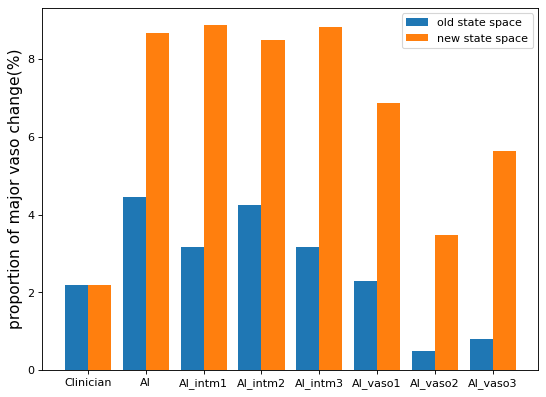

In [1]:
# Import Library

import numpy as np 
import matplotlib.pyplot as plt 

# Define Data
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
names = ['Clinician',"AI","AI_intm1","AI_intm2","AI_intm3","AI_vaso1","AI_vaso2","AI_vaso3"]

old = [2.19,4.45,3.17,4.24,3.17,2.3,0.5,0.8]

new = [2.19,8.68,8.87,8.50,8.82,6.88,3.47,5.64]

x_axis = np.arange(len(names))

# Multi bar Chart

plt.bar(x_axis -0.2, old, width=0.4, label = 'old state space')
plt.bar(x_axis +0.2, new, width=0.4, label = 'new state space')

# Xticks

plt.xticks(x_axis, names,fontsize=10)
plt.ylabel("proportion of major vaso change(%)", fontsize=14)

# Add legend

plt.legend()

# Display

plt.show()

In [58]:
df_comparisionai= df_comparision.sort_values(by=['vaso_changemmax', 'abchange_vaso_aimax'])
#df_comparision15= df_comparision.sort_values(by=['vaso_changemmax', 'abchange_vaso_p15max'])
df_comparisionintm1= df_comparision.sort_values(by=['vaso_changemmax', 'abchange_vaso_intm1max'])
df_comparisionintm2= df_comparision.sort_values(by=['vaso_changemmax', 'abchange_vaso_intm2max'])
df_comparisionvaso5= df_comparision.sort_values(by=['vaso_changemmax', 'abchange_vaso_vaso5max'])
df_comparisionvaso10= df_comparision.sort_values(by=['vaso_changemmax', 'abchange_vaso_vaso10max'])
df_comparisionvaso15= df_comparision.sort_values(by=['vaso_changemmax', 'abchange_vaso_vaso15max'])

In [59]:
plot_valueai1 = np.array(df_comparisionai['vaso_changemmax']) 
plot_valueai2 = np.array(df_comparisionai['abchange_vaso_aimax'])

#plot_value151 = np.array(df_comparision15['vaso_changemmax']) 
#plot_value152 = np.array(df_comparision15['abchange_vaso_p15max'])

plot_valueintm11 = np.array(df_comparisionintm1['vaso_changemmax']) 
plot_valueintm12 = np.array(df_comparisionintm1['abchange_vaso_intm1max'])

plot_valueintm21 = np.array(df_comparisionintm2['vaso_changemmax']) 
plot_valueintm22 = np.array(df_comparisionintm2['abchange_vaso_intm2max'])

plot_valuevaso51 = np.array(df_comparisionai['vaso_changemmax']) 
plot_valuevaso52 = np.array(df_comparisionai['abchange_vaso_vaso5max'])

plot_valuevaso101 = np.array(df_comparisionai['vaso_changemmax']) 
plot_valuevaso102 = np.array(df_comparisionai['abchange_vaso_vaso10max'])

plot_valuevaso151 = np.array(df_comparisionai['vaso_changemmax']) 
plot_valuevaso152 = np.array(df_comparisionai['abchange_vaso_vaso15max'])


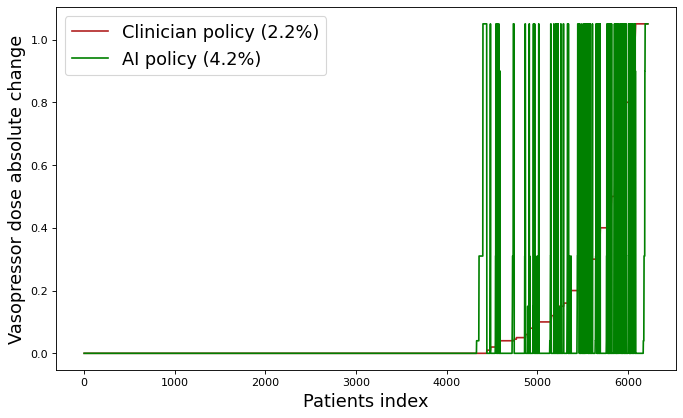

In [84]:
from matplotlib.pyplot import figure
figure(figsize=(10, 6), dpi=80)
plt.plot(plot_valueai1, 'firebrick', label = 'Clinician policy (2.2%)') 
plt.plot(plot_valueai2, 'green',label = 'AI policy (4.2%)') 
plt.xlabel('Patients index',fontsize=16)
plt.ylabel('Vasopressor dose absolute change',fontsize=16)
plt.legend(fontsize = 16)
plt.show()

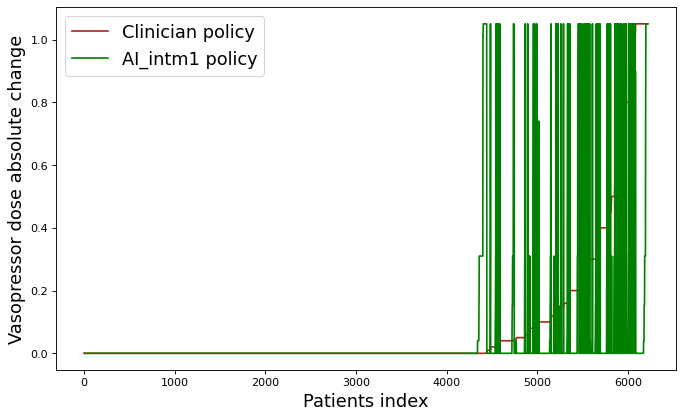

In [79]:
figure(figsize=(10, 6), dpi=80)
plt.plot(plot_valueintm11, 'firebrick', label = 'Clinician policy') 
plt.plot(plot_valueintm12, 'green',label = 'AI_intm1 policy') 
plt.xlabel('Patients index',fontsize=16)
plt.ylabel('Vasopressor dose absolute change',fontsize=16)
plt.legend(fontsize = 16)
plt.show()

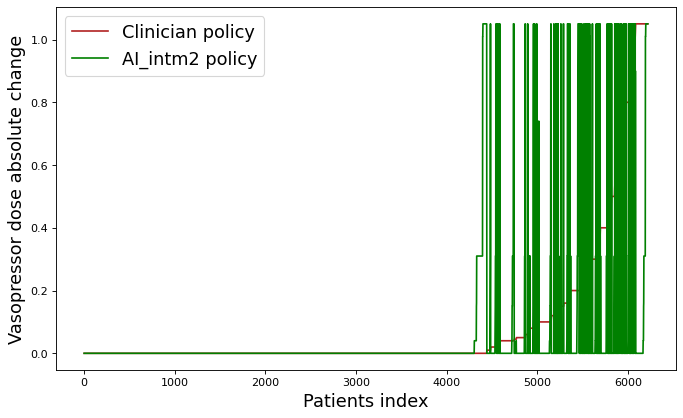

In [80]:
figure(figsize=(10, 6), dpi=80)
plt.plot(plot_valueintm21, 'firebrick', label = 'Clinician policy') 
plt.plot(plot_valueintm22, 'green',label = 'AI_intm2 policy') 
plt.xlabel('Patients index',fontsize=16)
plt.ylabel('Vasopressor dose absolute change',fontsize=16)
plt.legend(fontsize = 16)
plt.show()

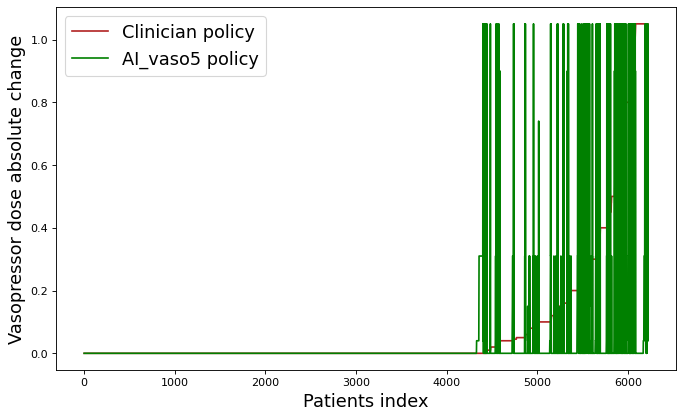

In [81]:
figure(figsize=(10, 6), dpi=80)
plt.plot(plot_valuevaso51, 'firebrick', label = 'Clinician policy') 
plt.plot(plot_valuevaso52, 'green',label = 'AI_vaso5 policy') 
plt.xlabel('Patients index',fontsize=16)
plt.ylabel('Vasopressor dose absolute change',fontsize=16)
plt.legend(fontsize = 16)
plt.show()

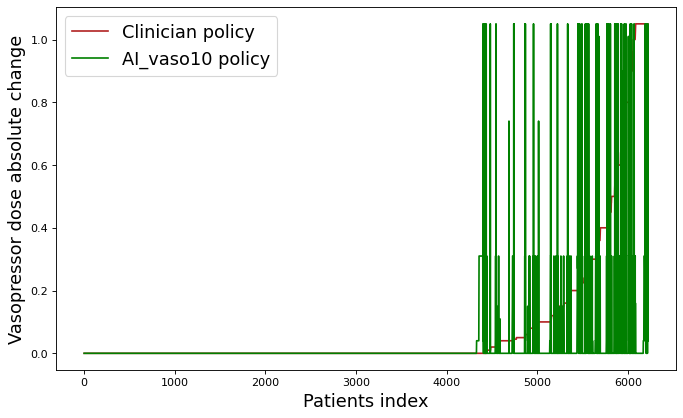

In [82]:
from matplotlib.pyplot import figure
figure(figsize=(10, 6), dpi=80)
plt.plot(plot_valuevaso101, 'firebrick', label = 'Clinician policy') 
plt.plot(plot_valuevaso102, 'green',label = 'AI_vaso10 policy') 
plt.xlabel('Patients index',fontsize=16)
plt.ylabel('Vasopressor dose absolute change',fontsize=16)
plt.legend(fontsize = 16)
plt.show()

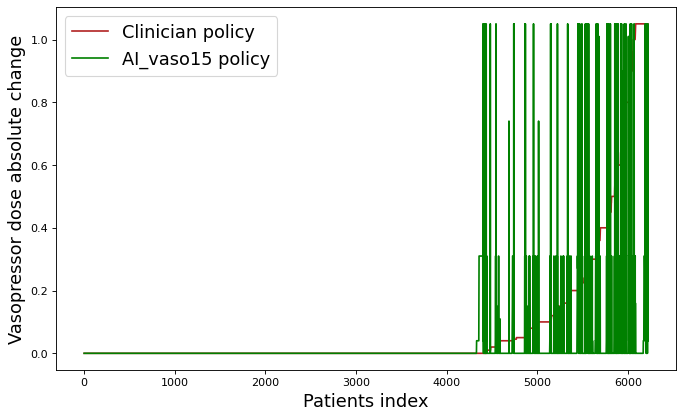

In [83]:
from matplotlib.pyplot import figure
figure(figsize=(10, 6), dpi=80)
plt.plot(plot_valuevaso151, 'firebrick', label = 'Clinician policy') 
plt.plot(plot_valuevaso152, 'green',label = 'AI_vaso15 policy') 
plt.xlabel('Patients index',fontsize=16)
plt.ylabel('Vasopressor dose absolute change',fontsize=16)
plt.legend(fontsize = 16)
plt.show()